In [24]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('bikeSharing.csv')

In [26]:
df['datetime'] = pd.to_datetime(df['dteday'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  object        
 2   weathersit  17379 non-null  int64         
 3   temp        17379 non-null  float64       
 4   atemp       17379 non-null  float64       
 5   hum         17379 non-null  float64       
 6   windspeed   17379 non-null  float64       
 7   casual      17379 non-null  int64         
 8   registered  17379 non-null  int64         
 9   cnt         17379 non-null  int64         
 10  datetime    17379 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 1.5+ MB


In [1]:
pip install influxdb-client

     |████████████████████████████████| 705 kB 5.5 MB/s eta 0:00:01
     |████████████████████████████████| 199 kB 83.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [8]:
from datetime import datetime

from influxdb_client import InfluxDBClient, Point, WritePrecision
from influxdb_client.client.write_api import SYNCHRONOUS

# You can generate an API token from the "API Tokens Tab" in the UI
token = "sda-token"
org = "sda"
bucket = "training"

In [32]:
sequence = []
for index, row in df.iterrows():
    point = (Point("bikesharing")
             .field("temp", row['temp'])
             .field("atemp", row['atemp'])
             .field("humidity", row['hum'])
             .field("windspeed", row['windspeed'])
             .field("casual", row['casual'])
             .field("registered", row['registered'])
             .field("count", row['cnt'])
          #   .field("season", row['season'])
          #   .field("holiday", row['holiday'])
          #   .field("workingday", row['workingday'])
             .field("weather", row['weathersit'])
             .time(row['datetime']))
    sequence+= [point.to_line_protocol()]

In [33]:
with InfluxDBClient(url="http://influxdb:8086", token=token, org=org) as client:
    write_api = client.write_api(write_options=SYNCHRONOUS)
    write_api.write(bucket, org, sequence)

In [2]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [40]:
df["year"]=pd.DatetimeIndex(df['datetime']).year
df["month"]=pd.DatetimeIndex(df['datetime']).month
df["hour"]=pd.DatetimeIndex(df['datetime']).hour
df["day"]=pd.DatetimeIndex(df['datetime']).day

In [44]:
subset = df.query("year==2011 & month==4")

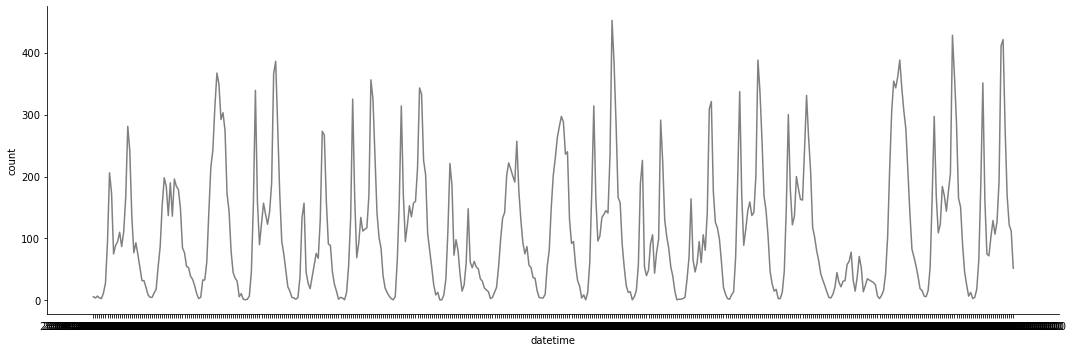

In [58]:
sns.relplot(x="datetime", y="count", kind="line", data=subset, aspect=3/1, color="grey");

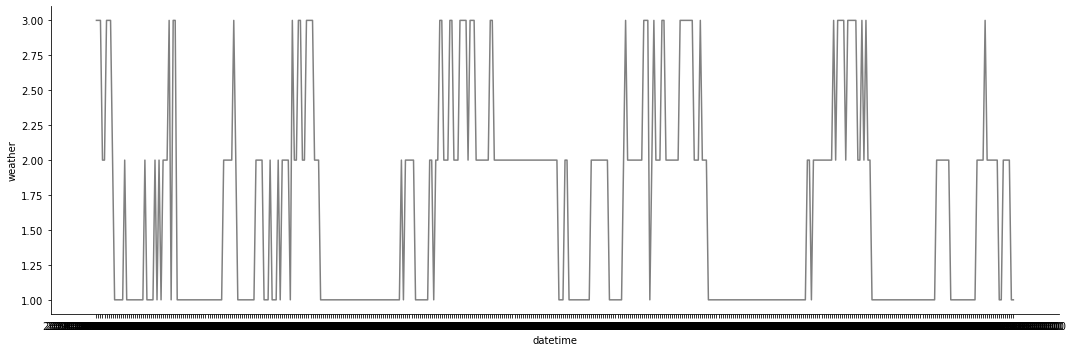

In [46]:
sns.relplot(x="datetime", y="weather", kind="line", data=subset, aspect=3/1, color="grey");

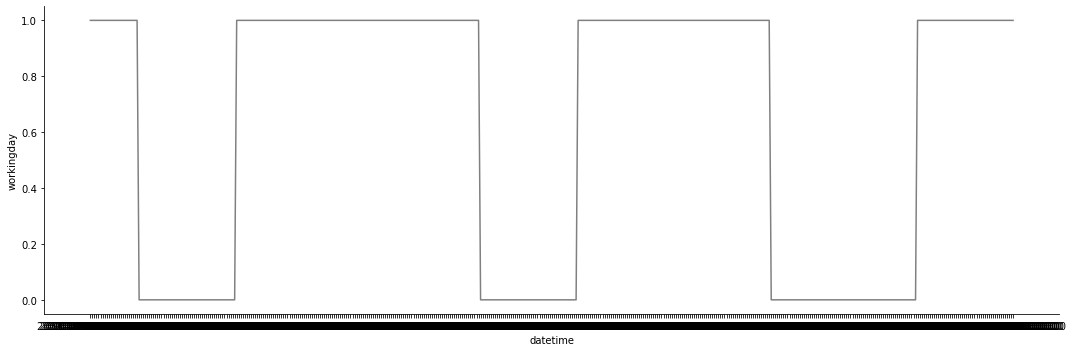

In [47]:
sns.relplot(x="datetime", y="workingday", kind="line", data=subset, aspect=3/1, color="grey");

/tmp/ipykernel_270/2260152519.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["r_temp"] = subset["temp"]/40*100


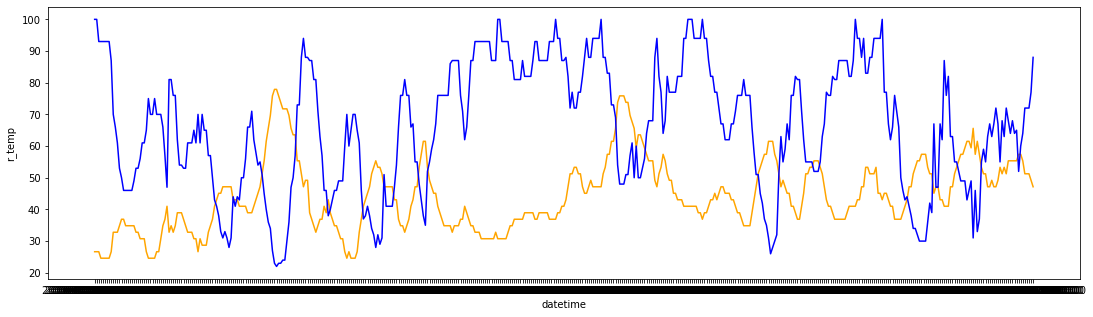

In [21]:
import matplotlib.pyplot as plt

subset["r_temp"] = subset["temp"]/40*100

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 5)
ax= sns.lineplot(x='datetime', y='r_temp', data=subset, color="orange")
ax1 = sns.lineplot(x='datetime', y='humidity', data=subset, color="blue")

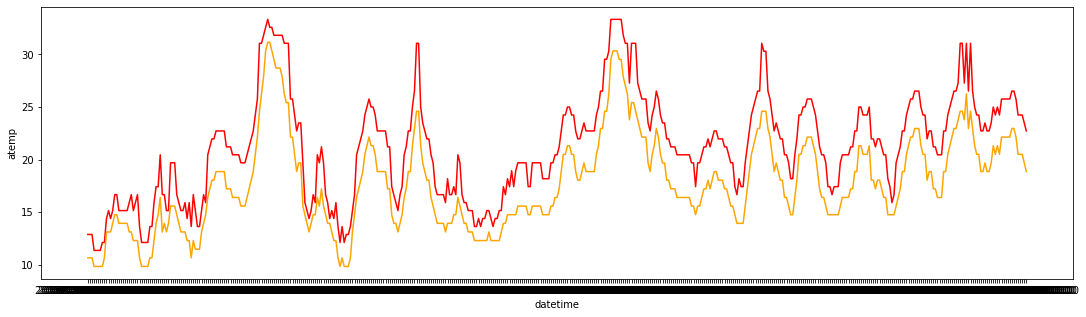

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 5)
ax= sns.lineplot(x='datetime', y='atemp', data=subset, color="red")
ax1 = sns.lineplot(x='datetime', y='temp', data=subset, color="orange")

/tmp/ipykernel_270/3266332135.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["r_count"] = subset["count"]/500*100
/tmp/ipykernel_270/3266332135.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["r_atemp"] = subset["atemp"]/40*100


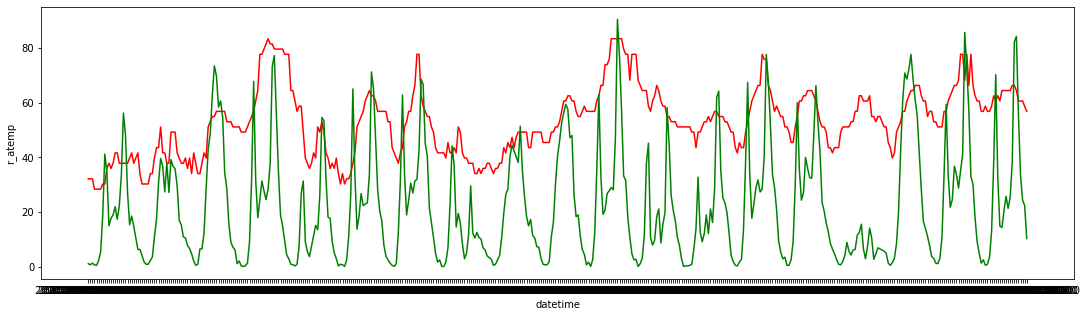

In [23]:
import matplotlib.pyplot as plt

subset["r_count"] = subset["count"]/500*100
subset["r_atemp"] = subset["atemp"]/40*100

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 5)
ax= sns.lineplot(x='datetime', y='r_atemp', data=subset, color="red")
ax1 = sns.lineplot(x='datetime', y='r_count', data=subset, color="green")

/tmp/ipykernel_270/3115143248.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["r_count"] = subset["count"]/500*100
/tmp/ipykernel_270/3115143248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["r_weather"] = (100-subset["weather"]/4*100)-25


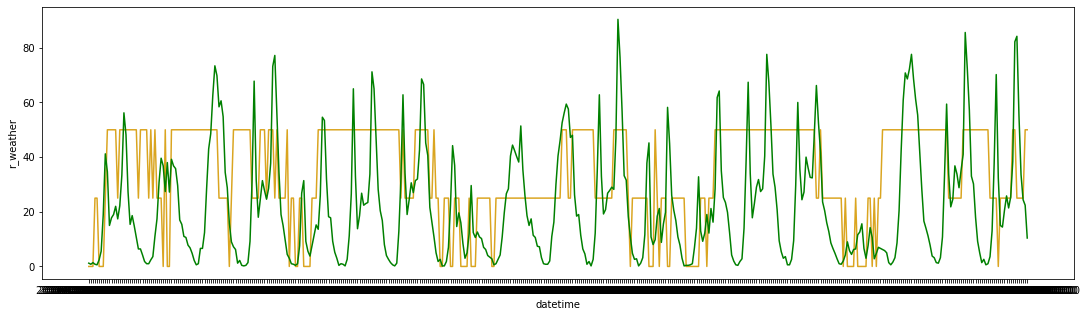

In [34]:
subset["r_count"] = subset["count"]/500*100
subset["r_weather"] = (100-subset["weather"]/4*100)-25

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 5)
ax= sns.lineplot(x='datetime', y='r_weather', data=subset, color="goldenrod")
ax1 = sns.lineplot(x='datetime', y='r_count', data=subset, color="green")

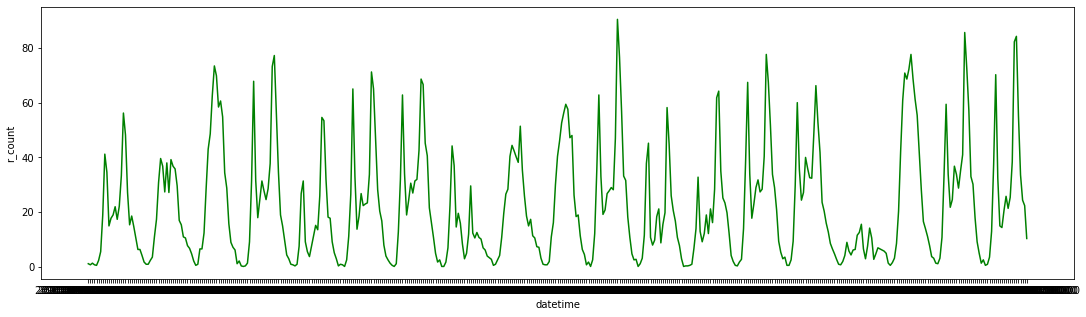

In [35]:
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 5)
ax = sns.lineplot(x='datetime', y='r_count', data=subset, color="green")

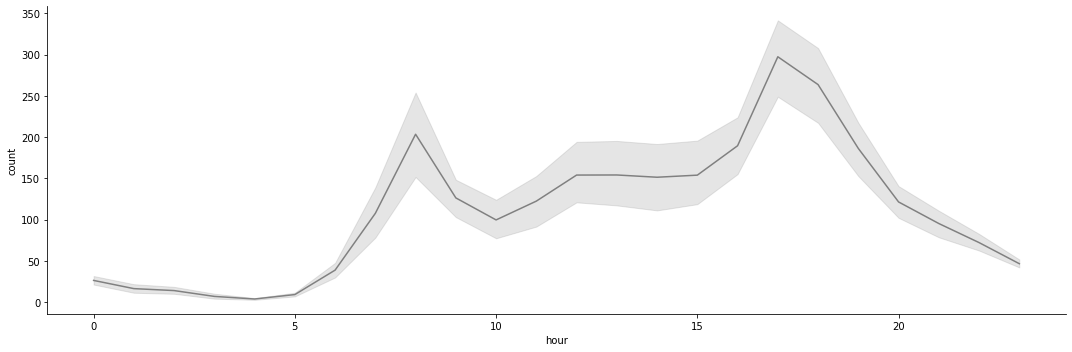

In [48]:
sns.relplot(x="hour", y="count", kind="line", data=subset, aspect=3/1, color="grey");

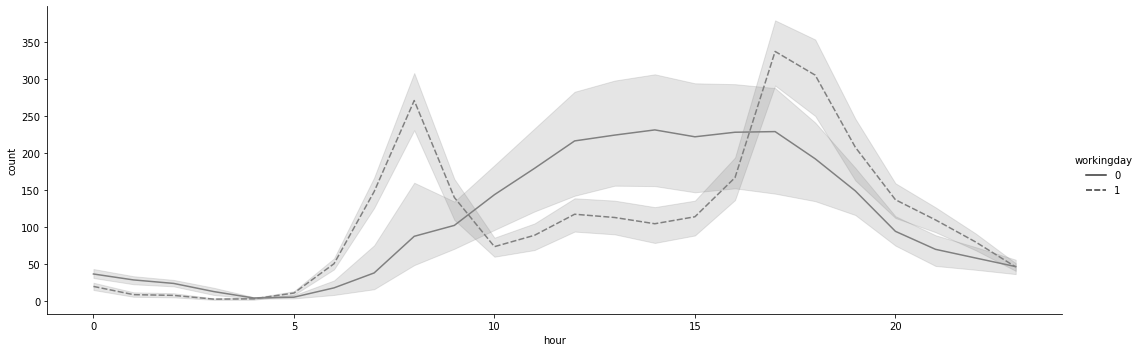

In [53]:
sns.relplot(x="hour", y="count", kind="line", style="workingday", data=subset, aspect=3/1, color="grey");

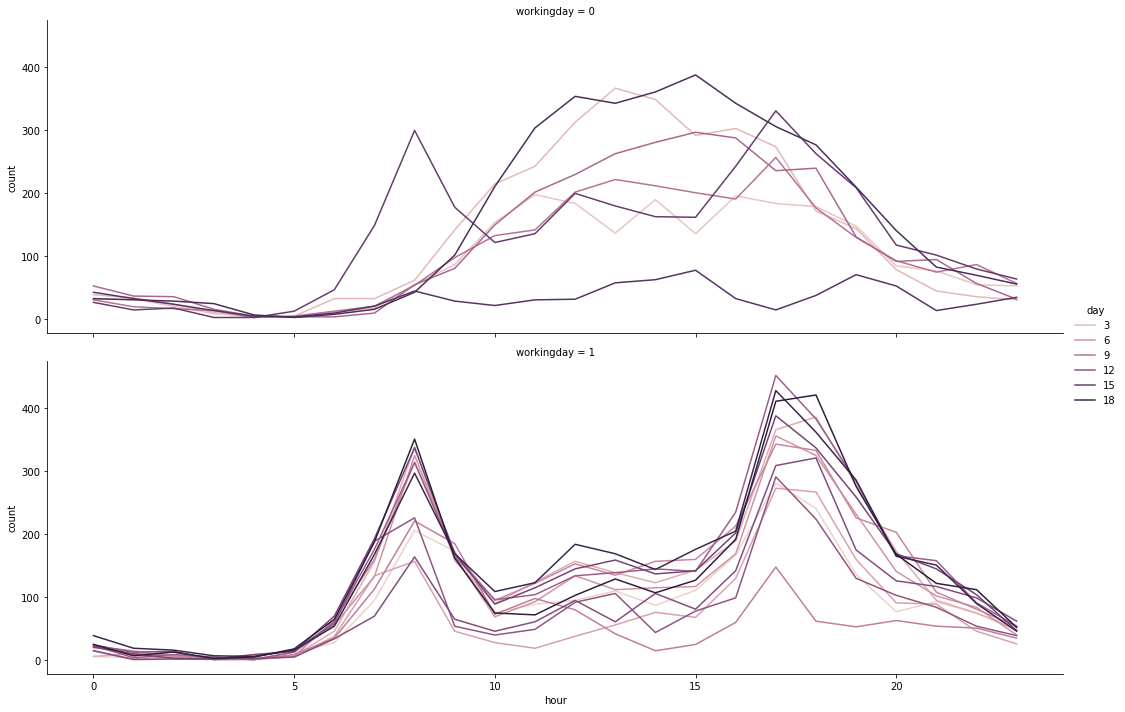

In [51]:
sns.relplot(x="hour", y="count", kind="line", hue="day", row="workingday", data=subset, aspect=3/1, color="grey");

In [ ]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(subset.set_index('datetime')["count"], model = 'additive',period=24, extrapolate_trend=168)

In [ ]:
sns.lineplot(data=decomposition.observed.to_frame(), x="datetime", y="count")

In [ ]:
sns.lineplot(data=decomposition.trend.to_frame(), x="datetime", y="trend")

In [ ]:
sns.lineplot(data=decomposition.seasonal.to_frame(), x="datetime", y="seasonal")

In [ ]:
sns.lineplot(data=decomposition.resid.to_frame(), x="datetime", y="resid")

In [ ]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(subset, model = 'additive',period=48)
decomposition.plot()

In [ ]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(subset, model = 'mutiplicative',period=24)
decomposition.plot()

In [ ]:
import numpy as np
sns.relplot(x="Year", y="Height", kind="line", data=df.query("Season=='Summer'"), ci='sd', estimator="mean", ax=axs)

In [ ]:
sns.relplot(x="Year", y="Height", kind="line", data=df.query("Season=='Summer'"), ax=axs)

In [ ]:
import numpy as np
sns.relplot(x="Year", y="Height", kind="line", data=df.query("Season=='Summer'"), ci="sd", estimator="mean", ax=axs)

In [ ]:
sns.relplot(x="Year", y="Height", kind="line", data=df.query("Season=='Summer'"), ci='sd', estimator="median", ax=axs)

In [ ]:
sns.relplot(x="Year", y="Height", kind="line", data=df, hue="Season", ax=axs)

In [ ]:
sns.relplot(x="Year", y="Height", kind="line", data=df, hue="Season", style="Sex")

In [ ]:
sns.relplot(x="Year", y="Weight", kind="line", data=df, hue="Season", style="Sex")

In [ ]:
sns.relplot(x="Year", y="Height", kind="line", data=df.query("NOC=='ITA'"),hue="Season", style="Sex")

In [ ]:
df.Sport.unique()

In [ ]:
sns.relplot(x="Year", y="Height", kind="line", data=df.query("Sport in ('Basketball', 'Football', 'Volleyball','Cross Country Skiing','Athletics','Swimming','Gymnastics','Alpine Skiing','Diving','Figure Skating')"), hue="Season", style="Sex", col="Sport", col_wrap=5)

In [ ]:
sns.relplot(x="Year", y="Height", kind="line", data=df.query("Sport in ('Basketball', 'Football', 'Volleyball','Cross Country Skiing','Athletics','Swimming','Gymnastics','Alpine Skiing','Diving','Figure Skating')"), hue="Season", style="Sex", col="Sport", col_wrap=5, ci='sd', estimator="median")